In [5]:
import pandas as pd
import settings
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore') # ignore warning for odd numpy/statsmodels VisibleDeprecationWarning in KDE plot

Import the cleaned training dataset

In [3]:
train_df = pd.read_csv('%s/train.csv' % settings.PROCESSED_DIR, header=0)
train_df = train_df[~train_df['foreclosure_status'].isnull()]

Produce KDE pair subplots for default & no default borrowers

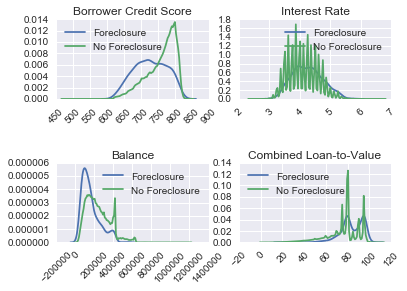

In [8]:
def kde_pair_subplot(ax, var_name, title):
    for tf in [True, False]:
        data = train_df.ix[train_df['foreclosure_status'] == tf, var_name]
        data = data[~data.isnull()]
        sns.kdeplot(data, legend=False, ax=ax)
    sns.plt.setp(ax.get_xticklabels(), rotation=45)
    ax.set_title(title)
    handles, labels = ax.get_legend_handles_labels()
    labels = ['Foreclosure', 'No Foreclosure']
    if (ax == ax1) or (ax == ax4):
        ax.legend(handles, labels, loc='upper left')
    else:
        ax.legend(handles, labels)

f, ((ax1, ax2), (ax3, ax4)) = sns.plt.subplots(2,2)
kde_axs = [ax1, ax2, ax3, ax4]
kde_vars = ['borrower_credit_score', 'interest_rate', 'balance', 'cltv']
kde_titles = ['Borrower Credit Score', 'Interest Rate', 'Balance', 'Combined Loan-to-Value']

for ax,var,title in zip(kde_axs, kde_vars, kde_titles):
    kde_pair_subplot(ax, var, title)

f.subplots_adjust(hspace=0.8, wspace=0.2)
sns.plt.show()

Create categorical groupby DataFrame for categorical bar plotting

In [9]:
cat_vars = ['channel','loan_purpose','first_time_homebuyer']
groupby_frames = {}

for v in cat_vars:
    # Calculate the total count of each foreclosure_status & categorical variable combination
    groupby_frames[v] = train_df.groupby(['foreclosure_status',v])[v].count()

    # Calculate percentage share of foreclosure_status-level percentage of each facet of the categorical variable
    groupby_frames[v] =  groupby_frames[v].groupby(level=0).apply(lambda x: x/float(x.sum()))
    groupby_frames[v] = pd.DataFrame(groupby_frames[v])
    groupby_frames[v].columns = ['share']

    # Flatten groupby frame to prepare for bar plot
    groupby_frames[v] = groupby_frames[v].reset_index()

Produce count/share bar plot for each categorical predi